# Computer Vision (CV2022): Assignment 1

### - Avirup Das (MDS202013)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 12)

## Question 1

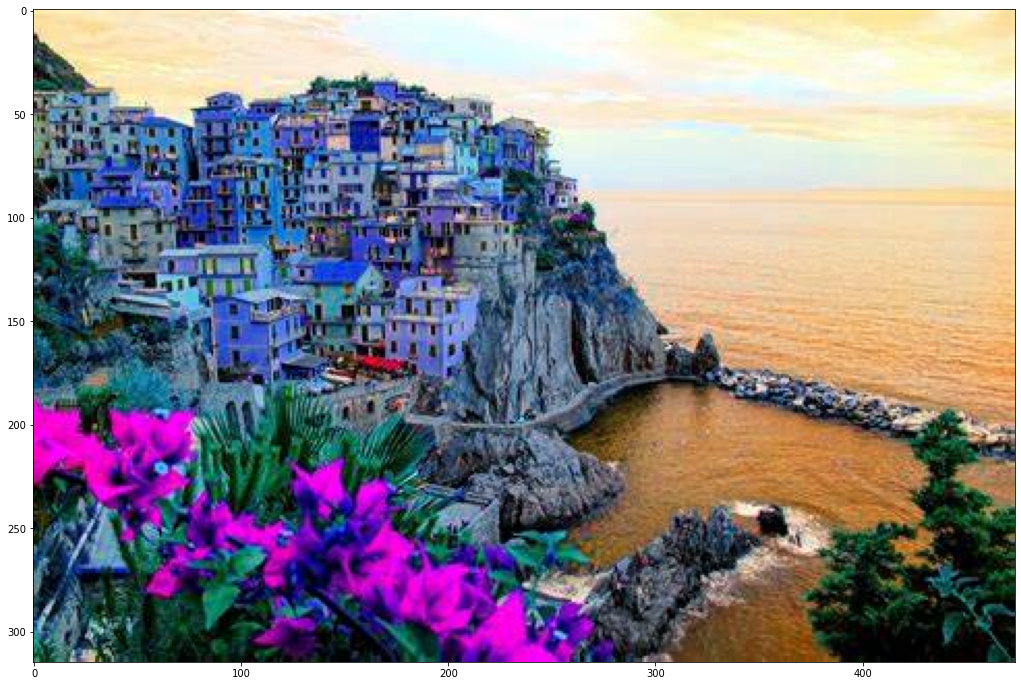

In [ ]:
# Reading the image
img = cv2.imread('CinqueTerre.jpg')
plt.imshow(img);

### Part a

In [ ]:
# Storing size and number of channels
h, w, c = img.shape
print(f'The image is of size: ({h}, {w})')
print(f'No. of channels= {c}')

The image is of size: (315, 474)
No. of channels= 3


### Part b

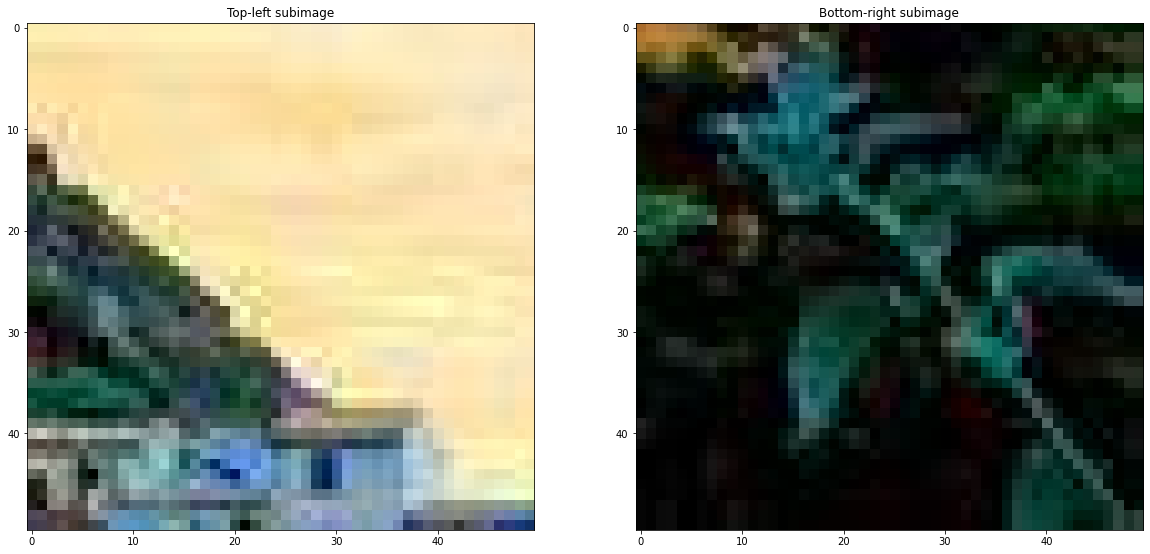

In [ ]:
# Extracting sub-images
subimg1 = img[0:50, 0:50, ]
subimg2 = img[h-50:h, w-50:w, ]
fig, ax = plt.subplots(1,2)
ax[0].imshow(subimg1)
ax[0].set_title('Top-left subimage')
ax[1].imshow(subimg2)
ax[1].set_title('Bottom-right subimage');

In [ ]:
# Converting to grayscale for intensity
gray_1 = cv2.cvtColor(subimg1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(subimg2, cv2.COLOR_BGR2GRAY)

# Define function for ssd
calculate_ssd = lambda x,y: ((x.astype(int)-y.astype(int))**2).sum()

# Calculating SSD 
SSD =  calculate_ssd(gray_1, gray_2)
print('SSD of the intensities = ', SSD)

SSD of the intensities =  62657575


## Question 2

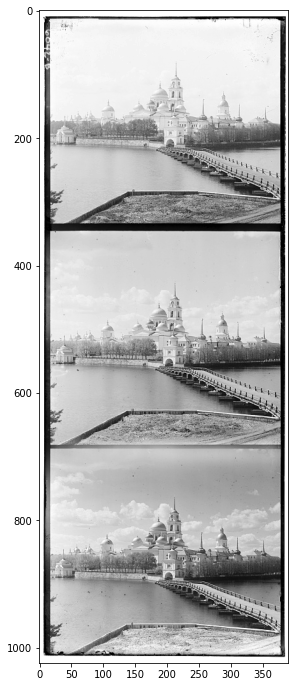

In [ ]:
# Reading the image (Flag =0 for grayscale image)
img = cv2.imread('monastery.jpg', 0)
plt.imshow(img, cmap='gray');

In [ ]:
# Splitting the image vertically to obtain the three channels
b, g, r = np.array_split(img, indices_or_sections=3, axis=0)
print('Dimensions of the individual channels are:', (b.shape, g.shape, r.shape), sep='\n')

Dimensions of the individual channels are:
((342, 391), (341, 391), (341, 391))


In [ ]:
# Fixing the resolution of final image as that of the blue channel
resolution = b.shape

def padding(img, res):
  delta_vertical = res[0] - img.shape[0]
  pad_top = delta_vertical//2
  pad_bottom = delta_vertical - pad_top
  delta_horizontal = res[1] - img.shape[1]
  pad_left = delta_horizontal//2
  pad_right = delta_horizontal - pad_left
  return cv2.copyMakeBorder(img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)

In [ ]:
# Making all channels of the same resolution
g = padding(g, resolution)
r = padding(r, resolution)

### Part a

In [ ]:
# Function for sliding picture by (dx, dy)
def translation(img, dy, dx):
  # y-axis roll
  new_img = np.roll(img, dy, axis=0)
  if dy>0:
    new_img[0:dy,:]=0
  elif dy<0:
    new_img[dy:,:]=0

  # y-axis roll
  new_img = np.roll(new_img, dx, axis=1)
  if dx>0:
    new_img[:, 0:dx]=0
  elif dx<0:
    new_img[:, dx:]=0

  return new_img

# Slide picture and minimise SSD

def align_image(bottom, top):
  min_ssd, align, displacement = np.inf, None, None
  for i in range(-10, 11):
    for j in range(-10, 11):
      new_top = translation(top, i, j)
      """
       Removing 10 pixels from each side of both images before calculating
       SSD to remove noise at the borders
      """
      cropped_top = new_top[10:new_top.shape[0]-10, 10:new_top.shape[1]-10]
      cropped_bottom = bottom[10:bottom.shape[0]-10, 10:bottom.shape[1]-10]
      SSD = calculate_ssd(cropped_bottom, cropped_top)
      if SSD <= min_ssd:
        align = new_top
        min_ssd = SSD
        displacement = [i, j]
  return align, displacement, min_ssd

### Part b

In [ ]:
g_aligned, disp_g, ssd_g = align_image(b, g)
r_aligned, disp_r, ssd_r = align_image(b, r)

print(f'Green Channel:\nDisplacement= {disp_g}\t SSD= {ssd_g}')
print(f'Red Channel:\nDisplacement= {disp_r}\t SSD= {ssd_r}')

Green Channel:
Displacement= [-2, 2]	 SSD= 169101693
Red Channel:
Displacement= [4, 2]	 SSD= 392475460


### Part c

In [ ]:
#col_img = cv2.merge([b, g_aligned, r_aligned])
col_img = cv2.merge([r_aligned, g_aligned, b])

### Part d

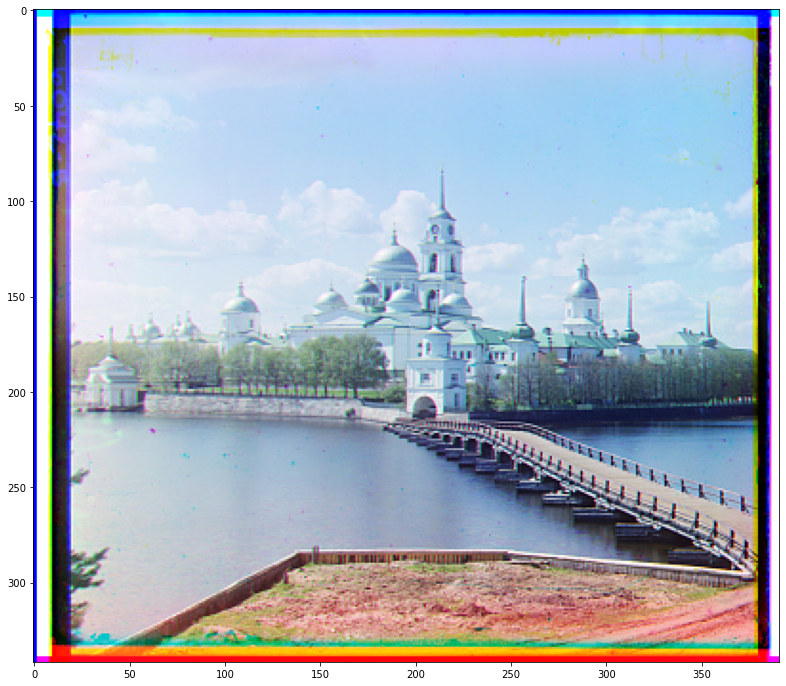

In [ ]:
plt.imshow(col_img);

In [ ]:
import matplotlib.image as mpimg
mpimg.imsave("Aligned.jpg", col_img)

## Question 3

- **"AGE IS ALL IN YOUR HEAD," VICTORIA SKYE // U.S.A.**
The illusion is depicted with three pictures taken by Victoria Skye who was trying to take a picture of a photo portrait of her father as teen. Strong overhead lightings forced her to tilt the camera to avoid the glare. This back and forth motion of the camera changed the perspective of age of her father. This kind of illusion is referred to as `anamorphic perspective`. Tilting of the camera caused the creation of two opposite vanishing points, resulting in the illusion of age progression/regression (depending whether the camera is tilted back or forth). For the illusion of age progression, the top of the head narrows (as if it would converge at some point) and the bottom half of the face expands (the lines from the bottom part of the picture appear to be converging to the upper vanishing point). For the case of age regression the opposite happens, i.e., the forehead expands and the chin narrows down (the lower vanishing point comes to play) hence producing a younger appearance. 

- **"FLOATING STAR," JOSEPH HAUTMAN/KAIA NAO**
The image consists of a 5-pointed star on a light ochre background and irregular blue patches. The star appears to be rotating clockwise whereas in reality it is an image and hence is static. The dark-blue patches have black and white borders against the background which is a lightly colored one. This causes stimulation of the motion-sensitive neurons when one looks around the image. These stimulated neurons in turn signal motion by virtue of the shifting light and dark boundaries that indicate an object's contour as it moves through space. Carefully arranged transitions between white, light-colored, black, and dark-colored regions are capable of fooling these neurons into responding as if they were seeing continual motion in the same direction, rather than stationary edges.